In [1]:
import scipy.io
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MaxAbsScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.callbacks import  EarlyStopping
import random

In [2]:
#train 데이터 불러오기
train_sub_data = scipy.io.loadmat('../../../../datas/ECG/200hz/ECG_EB_train.mat', squeeze_me=True)['ecg_train']
# 구조 변환
train_sub_data = train_sub_data.reshape(5, 3200, 10)

# test 데이터 불러오기
test_sub_data = scipy.io.loadmat('../../../../datas/ECG/200hz/ECG_EB_test.mat', squeeze_me=True)['ecg_test']
# 구조 변환
test_sub_data = test_sub_data.reshape(5, 640, 10)

# sub 수
sub_cnt = train_sub_data.shape[0]

# 데이터를 스케일링 하기 위해 2D로 reshape
train_sub_2D = train_sub_data.reshape(-1, 1)
test_2D = test_sub_data.reshape(-1, 1)

# 데이터를 StandardScaler로 스케일링
# 데이터들 모두 같은 방식으로 스케일링함
SDscaler = StandardScaler()
SDscaler.fit(train_sub_2D)
train_scaled = SDscaler.transform(train_sub_2D)
test_scaled = SDscaler.transform(test_2D)

# 데이터 크기를 10으로 맞춰줌
data_size = 10

# 1명당 데이터 개수
train_data_cnt = 320
test_data_cnt = 64

train_data = train_scaled.reshape(sub_cnt * train_data_cnt, data_size, 10)
test_data = test_scaled.reshape(sub_cnt * test_data_cnt, data_size, 10)

print("#############")
print(train_data.shape)
print(test_data.shape)

#train data를 sub:other=1:1로 만들기 위해서 각 sub 추출
train_data_each = []
for i in range(sub_cnt):
    train_data_each.insert(i, train_data[i*train_data_cnt:(i+1)*train_data_cnt, :, :])

#test data를 sub:other=1:1로 만들기 위해서 각 sub 추출
test_data_each = []
for i in range(sub_cnt):
    test_data_each.insert(i, test_data[i*test_data_cnt:(i+1)*test_data_cnt, :, :])
# print(test_data_each)

print(len(train_data_each))
print(len(test_data_each))

#############
(1600, 10, 10)
(320, 10, 10)
5
5


In [3]:
# 평가 지표
test_pre_all = []
conf_mat_all = []
test_loss_all = []
test_acc_all = []
test_sen_all = []
test_spe_all = []
frr_all = []
far_all = []

(1280, 10, 10)
(256, 10, 10)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 10)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 10, 10)            310       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 4, 10)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                19200     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                1300      
_________________________________________________________________
dense_1 (Dense)              (No

64/64 [==============================] - 0s 2ms/step - loss: 0.0318 - accuracy: 0.9908
Epoch 70/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0124 - accuracy: 0.9931
Epoch 71/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 0.9986
Epoch 72/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0099 - accuracy: 0.9944
Epoch 73/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1126 - accuracy: 0.9699
Epoch 74/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0078 - accuracy: 0.9977
Epoch 75/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 0.9992
Epoch 76/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0086 - accuracy: 0.9965
Epoch 77/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0133 - accuracy: 0.9960
Epoch 78/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 0.9978
Epoch 79/100


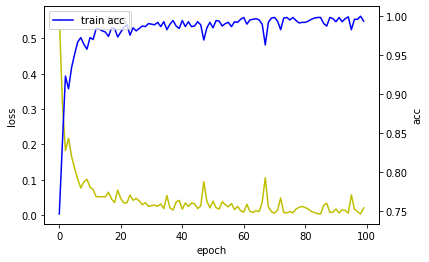

8/8 - 0s - loss: 0.3644 - accuracy: 0.9336
[[177  15]
 [  2  62]]

 [192  64]
sensitivity :  0.96875
specificity :  0.921875
frr :  0.03125
far :  0.078125


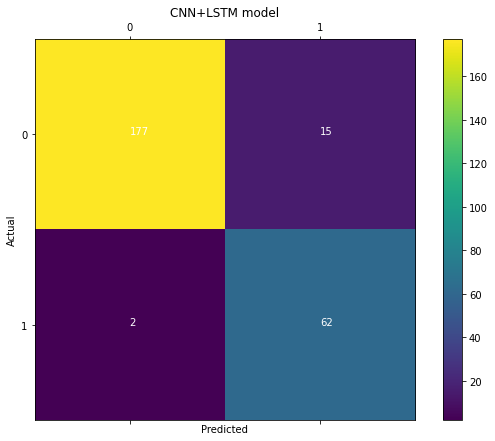

(1280, 10, 10)
(256, 10, 10)
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10, 10)]          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 10, 10)            310       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4, 10)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                19200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1300      
_________________________________________________________________
dense_3 (Dense)              (

64/64 [==============================] - 0s 2ms/step - loss: 0.0244 - accuracy: 0.9910
Epoch 70/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0393 - accuracy: 0.9881
Epoch 71/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0480 - accuracy: 0.9796
Epoch 72/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 0.9878
Epoch 73/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0305 - accuracy: 0.9872
Epoch 74/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0222 - accuracy: 0.9925
Epoch 75/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0113 - accuracy: 0.9956
Epoch 76/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0121 - accuracy: 0.9944
Epoch 77/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0362 - accuracy: 0.9857
Epoch 78/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0437 - accuracy: 0.9861
Epoch 79/100


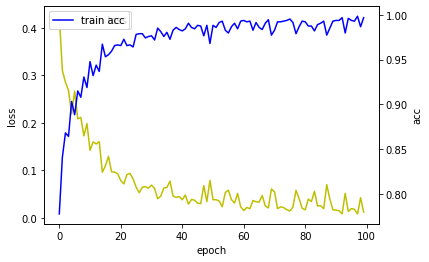

8/8 - 0s - loss: 0.7941 - accuracy: 0.9336
[[192   0]
 [ 17  47]]

 [192  64]
sensitivity :  0.734375
specificity :  1.0
frr :  0.265625
far :  0.0


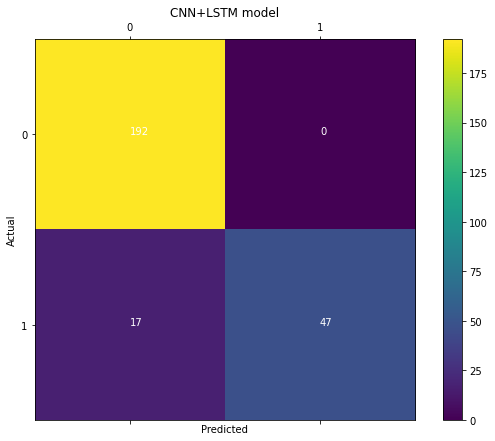

(1280, 10, 10)
(256, 10, 10)
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 10, 10)]          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10, 10)            310       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 4, 10)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                19200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                1300      
_________________________________________________________________
dense_5 (Dense)              (

64/64 [==============================] - 0s 2ms/step - loss: 0.0593 - accuracy: 0.9717
Epoch 70/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0668 - accuracy: 0.9684
Epoch 71/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0772 - accuracy: 0.9678
Epoch 72/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0492 - accuracy: 0.9812
Epoch 73/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0627 - accuracy: 0.9734
Epoch 74/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0579 - accuracy: 0.9716
Epoch 75/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1182 - accuracy: 0.9510
Epoch 76/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0844 - accuracy: 0.9617
Epoch 77/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0611 - accuracy: 0.9734
Epoch 78/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0567 - accuracy: 0.9719
Epoch 79/100


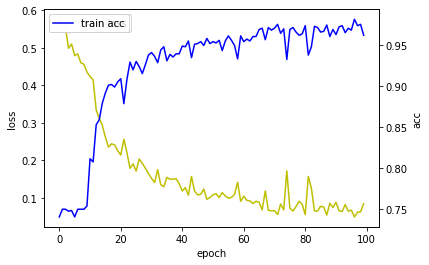

8/8 - 0s - loss: 0.3909 - accuracy: 0.8242
[[189   3]
 [ 42  22]]

 [192  64]
sensitivity :  0.34375
specificity :  0.984375
frr :  0.65625
far :  0.015625


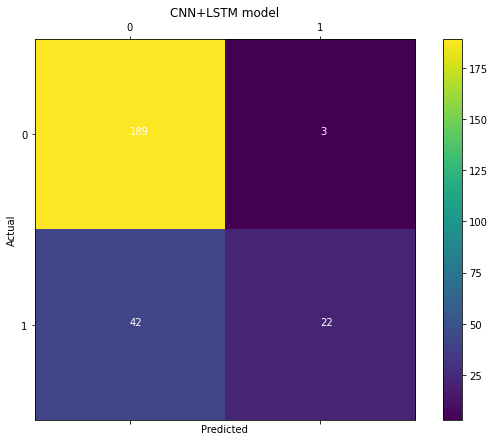

(1280, 10, 10)
(256, 10, 10)
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 10, 10)]          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 10, 10)            310       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 4, 10)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                19200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 20)                1300      
_________________________________________________________________
dense_7 (Dense)              (

64/64 [==============================] - 0s 2ms/step - loss: 0.0494 - accuracy: 0.9846
Epoch 70/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1401 - accuracy: 0.9523
Epoch 71/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0505 - accuracy: 0.9761
Epoch 72/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0547 - accuracy: 0.9804
Epoch 73/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0404 - accuracy: 0.9829
Epoch 74/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0330 - accuracy: 0.9859
Epoch 75/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0819 - accuracy: 0.9732
Epoch 76/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0302 - accuracy: 0.9880
Epoch 77/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0438 - accuracy: 0.9812
Epoch 78/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0437 - accuracy: 0.9862
Epoch 79/100


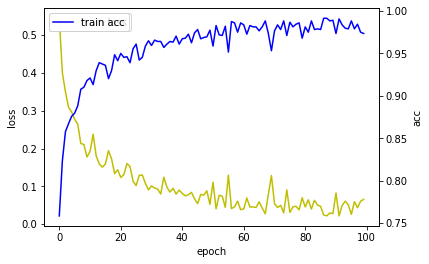

8/8 - 0s - loss: 1.3742 - accuracy: 0.7656
[[132  60]
 [  0  64]]

 [192  64]
sensitivity :  1.0
specificity :  0.6875
frr :  0.0
far :  0.3125


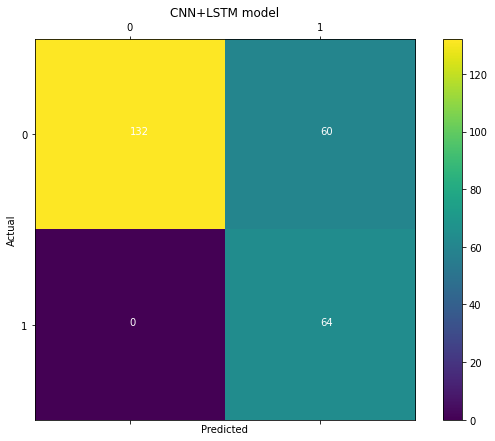

(1280, 10, 10)
(256, 10, 10)
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 10, 10)]          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 10, 10)            310       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 4, 10)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                19200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 20)                1300      
_________________________________________________________________
dense_9 (Dense)              (

64/64 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 0.9862
Epoch 70/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0442 - accuracy: 0.9886
Epoch 71/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0645 - accuracy: 0.9742
Epoch 72/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0223 - accuracy: 0.9946
Epoch 73/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0259 - accuracy: 0.9898
Epoch 74/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0737 - accuracy: 0.9706
Epoch 75/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0360 - accuracy: 0.9885
Epoch 76/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0259 - accuracy: 0.9913
Epoch 77/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0355 - accuracy: 0.9875
Epoch 78/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0408 - accuracy: 0.9845
Epoch 79/100


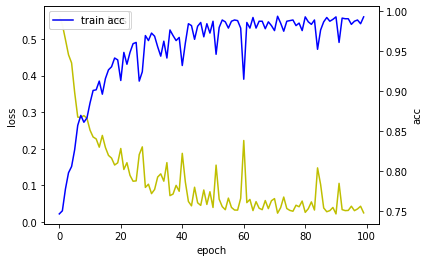

8/8 - 0s - loss: 1.2678 - accuracy: 0.8359
[[180  12]
 [ 30  34]]

 [192  64]
sensitivity :  0.53125
specificity :  0.9375
frr :  0.46875
far :  0.0625


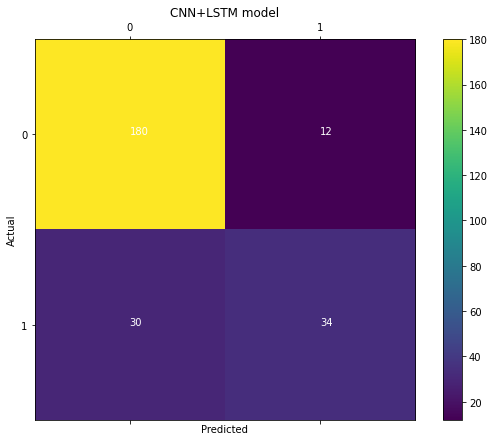

average_accuracy
0.85859375
average_sensitivity
0.715625
average_specificity
0.90625
average_frr
0.284375
average_far
0.09375


In [4]:
#1 to 3 비율로 설정
ratio = 3

# 각 sub 마다 모델 학습

##4중에서 3배 만들기
# train data를 sub:other = 1:3로 만들기
# 데이터 덩어리 개수 320 : 960
# 240 * 4 = 960

# test data를 sub:other = 1:3로 만들기
# 데이터 덩어리 개수 64 : 192
# 48 * 4 = 192

for i in range(sub_cnt):
    cnt = 0
    train_data_n = train_data_each[i]
    test_data_n = test_data_each[i]
    
    for j in range(sub_cnt):
        if j != i and cnt < 4:
            cnt = cnt + 1
            train_data_n = np.append(train_data_n, np.array(random.sample(list(train_data_each[j]), 240)), axis = 0)
        elif j != i and cnt >= 4:
            train_data_n = np.append(train_data_n, np.array(random.sample(list(train_data_each[j]), 240)), axis = 0)
    
    cnt = 0
    
    for j in range(sub_cnt):
        if j != i and cnt < 4:
            cnt = cnt + 1
            test_data_n = np.append(test_data_n, np.array(random.sample(list(test_data_each[j]), 48)), axis = 0)
        elif j != i and cnt >= 4:
            test_data_n = np.append(test_data_n, np.array(random.sample(list(test_data_each[j]), 48)), axis = 0)
            
    print(train_data_n.shape)
    print(test_data_n.shape)
    
    train_label = np.zeros(train_data_cnt*(ratio+1))
    test_label = np.zeros(test_data_cnt*(ratio+1))
    
    for j in range(len(train_label)):
        if (j < train_data_cnt):
            train_label[j] = 1
            
    for j in range(len(test_label)):
        if (j < test_data_cnt):
            test_label[j] = 1
 
    ################################################################
    # 모델 구성하기                                                #
    # 이진 분류이기 때문에 0~1 사이의 값을 나타내는 출력뉴런 1개   #
    ################################################################
    # Cnn 층
    inputs = tf.keras.Input(shape = (10, 10))

    layers = tf.keras.layers.Conv1D(filters = 10, kernel_size = 3, strides = 1, padding = 'same', activation  = 'relu')(inputs)
    layers = tf.keras.layers.MaxPool1D(pool_size=3, padding='same')(layers)

#     layers = tf.keras.layers.Conv1D(filters = 30, kernel_size = 3, strides = 1, padding = 'same', activation  = 'relu')(layers)
#     layers = tf.keras.layers.MaxPool1D(pool_size=3, padding='same')(layers)

#     layers = tf.keras.layers.Conv1D(filters = 64, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu')(layers)
#     layers = tf.keras.layers.MaxPool1D(pool_size=3, padding='same')(layers)

    # LSTM 층
    layers = tf.keras.layers.LSTM(64)(layers)

    # Dense 층
    layers = tf.keras.layers.Dropout(0.3)(layers)
    layers = tf.keras.layers.Dense(20, activation='relu')(layers)
#     layers = tf.keras.layers.Dense(64, activation='relu')(layers)
    layers = tf.keras.layers.Dense(1, activation='sigmoid')(layers)

    model = tf.keras.models.Model(inputs = inputs, outputs = layers)
    model.compile(loss= 'binary_crossentropy', optimizer= tf.keras.optimizers.Adam(0.005), metrics=['accuracy'])
    model.summary()
    
    early_stopping = tf.keras.callbacks.EarlyStopping(patience= 20)
    
    #     # train 데이터를 train과 validation으로 분배
#     # validation 데이터를 여러 sub에서 가져갈 수 있도록 shuffle
#     x_train, x_val, y_train, y_val = train_test_split(train_data, train_label, test_size=0.1, shuffle=True, random_state=1)

    print('##########')
    print('# sub', i+1, ' #')
    print('##########')

    # 모델 돌리기
#     hist = model.fit(x_train, y_train, batch_size=40, epochs=200, validation_data=(x_val, y_val), verbose=1, callbacks= [early_stopping])
    hist = model.fit(train_data_n, train_label, batch_size=20, epochs=100, verbose=1)
    
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()
    
    loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper left')
    
    
    acc_ax.plot(hist.history['accuracy'], 'b', label = 'train acc')
    acc_ax.set_ylabel('acc')
    acc_ax.legend(loc='upper left')
    
    plt.show()
    
    # save model
    model.save('Sub_Model_' + str(i + 1) + '.h5')
    
    test_loss, test_acc = model.evaluate(test_data_n, test_label, verbose= 2)
    test_pred = model.predict(test_data_n)
    
    test_loss_all.append(test_loss)
    test_acc_all.append(test_acc)
    
    # 확률이 0.5이상이면 자신(1), 작으면 타인(0)
    for i in range(len(test_pred)):
        if(0.5 <= test_pred[i]):
            test_pred[i] = 1

        else:
            test_pred[i] = 0
            
            
    test_pre_all.append(test_pred)
    
    # confusion matrix 생성
    conf_matrix = confusion_matrix(test_label, test_pred)
    
    #############################################################
    #       conf_matrix[0][0] = TN      conf_matrix[0][1] = FP  #
    #       conf_matrix[1][0] = FN      conf_matrix[1][1] = TP  #
    #############################################################

    print(conf_matrix)
    conf_mat_all.append(conf_matrix)

    # sum 이용 각 행 더하기
    row = conf_matrix.sum(axis=1)
    print('\n', row)

    # row[0] = spec의 분모, row[1] = sens의 분모

    test_sensitivity = conf_matrix[1][1] / row[1]
    test_specificity = conf_matrix[0][0] / row[0]
    
    test_frr = conf_matrix[1][0] / (conf_matrix[1][1]+conf_matrix[1][0])
    test_far = conf_matrix[0][1] / (conf_matrix[0][1]+conf_matrix[0][0])

    print('sensitivity : ', test_sensitivity)
    print('specificity : ', test_specificity) 
    print('frr : ', test_frr)
    print('far : ', test_far) 
    
    test_sen_all.append(test_sensitivity)
    test_spe_all.append(test_specificity)
    frr_all.append(test_frr)
    far_all.append(test_far)
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111)

    cax = ax.matshow(conf_matrix)

    fig.colorbar(cax)

    for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
        plt.text(j, i, conf_matrix[i, j], color="white")

    plt.title('CNN+LSTM model')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.show()
    
print('average_accuracy')
print(np.mean(test_acc_all))
print('average_sensitivity')
print(np.mean(test_sen_all))
print('average_specificity')
print(np.mean(test_spe_all))
print('average_frr')
print(np.mean(frr_all))
print('average_far')
print(np.mean(far_all))